In [14]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: ______
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?




-> Primera Derivada
h = 1.0e-01, Aproximación: -0.38268, Error: 1.27e-06
h = 3.6e-02, Aproximación: -0.38268, Error: 2.13e-08
h = 1.3e-02, Aproximación: -0.38268, Error: 3.55e-10
h = 4.6e-03, Aproximación: -0.38268, Error: 5.92e-12
h = 1.7e-03, Aproximación: -0.38268, Error: 8.33e-14
h = 6.0e-04, Aproximación: -0.38268, Error: 4.04e-14
h = 2.2e-04, Aproximación: -0.38268, Error: 2.68e-13
h = 7.7e-05, Aproximación: -0.38268, Error: 1.22e-15
h = 2.8e-05, Aproximación: -0.38268, Error: 9.69e-13
h = 1.0e-05, Aproximación: -0.38268, Error: 8.63e-13


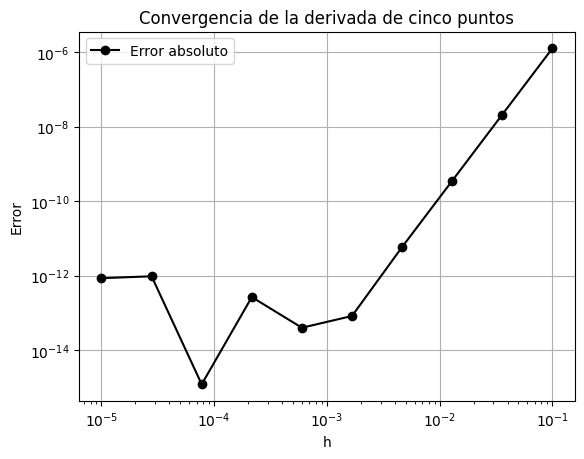


--> Segunda Derivada
con h = 0.05
Aproximación f''(x): -0.92369
Valor exacto      : -0.92388
Error absoluto    : 1.92e-04


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Derivada centrada de cinco puntos
def five_point_derivative(f, x, h):
    return (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h)) / (12*h)

# Segunda derivada centrada
def second_derivative(f, x, h):
    return (f(x + h) - 2*f(x) + f(x - h)) / h**2

# Función cos(x) y derivadas exactas
f = np.cos
f_prime_exact = lambda x: -np.sin(x)
f_double_prime_exact = lambda x: -np.cos(x)

# Punto donde se evalúa
x0 = np.pi / 8

# Evaluar la primera derivada en distintos h
h_vals = np.logspace(-1, -5, 10)
errores = []

print("\n-> Primera Derivada")
for h in h_vals:
    approx = five_point_derivative(f, x0, h)
    exact = f_prime_exact(x0)
    error = np.abs(approx - exact)
    errores.append(error)
    print(f"h = {h:.1e}, Aproximación: {approx:.5f}, Error: {error:.2e}")

# Gráfica de convergencia
plt.loglog(h_vals, errores, '-o', label="Error absoluto", color='black')
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Convergencia de la derivada de cinco puntos")
plt.grid()
plt.legend()
plt.show()

# Segunda derivada en x = pi/8 con h = 0.05
h = 0.05
second_approx = second_derivative(f, x0, h)
second_exact = f_double_prime_exact(x0)
error_second = np.abs(second_approx - second_exact)

print("\n--> Segunda Derivada")
print(f"con h = 0.05")
print(f"Aproximación f''(x): {second_approx:.5f}")
print(f"Valor exacto      : {second_exact:.5f}")
print(f"Error absoluto    : {error_second:.2e}")


El error mejora con un h menor; sin embargo, como se puede observar en el gráfico, si elegimos un h muy pequeño, el error puede aumentar.
De igual forma, si tomamos un h mayor, el error será más grande. En este caso, el valor en el que el error fue mínimo, fue con $h=10^{-4}$.

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?


DERIVADAS EN x = 2.0
Valor exacto f'(2.0): 22.16717
Valor exacto f''(2.0): 29.55622

Usando h del arreglo (h = 0.080):
Aproximación f'(2.0): 22.16709761 (error: 7.07e-05)
Aproximación f''(2.0): 29.57987610 (error: 2.37e-02)

Comparación con numpy.gradient:
h		Método f'(Error)	np.gradient f'(Error)	Método f''(Error)
----------------------------------------------------------------
0.010		1.72e-08		6.16e-04		3.69e-04
0.020		2.76e-07		2.46e-03		1.48e-03
0.030		1.40e-06		5.54e-03		3.33e-03
0.040		4.41e-06		9.85e-03		5.91e-03
0.050		1.08e-05		1.54e-02		9.24e-03
0.060		2.24e-05		2.22e-02		1.33e-02
0.070		4.14e-05		3.02e-02		1.81e-02
0.080		7.07e-05		3.94e-02		2.37e-02
0.090		1.13e-04		4.99e-02		2.99e-02
0.100		1.73e-04		6.16e-02		3.70e-02


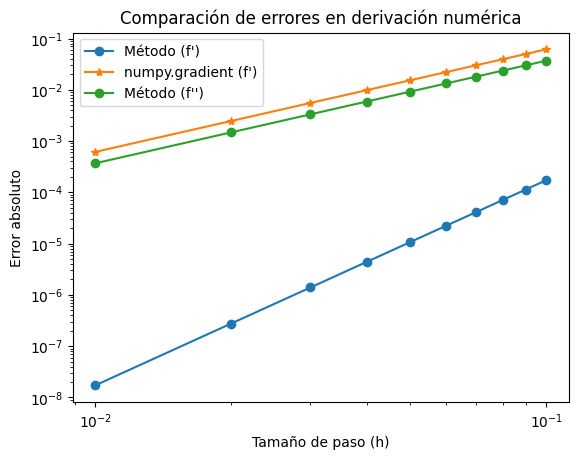


VALORES ÓPTIMOS DE h
Para nuestro f': h_opt = 0.010 (Error: 1.72e-08)
Para numpy.gradient: h_opt = 0.010 (Error: 6.16e-04)
Para nuestro f'': h_opt = 0.010 (Error: 3.69e-04)


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Función y derivadas exactas
f = lambda x: x * np.exp(x)
f_prime_exact = lambda x: np.exp(x) * (x + 1)
f_double_prime_exact = lambda x: np.exp(x) * (x + 2)

x0 = 2.0
exact_prime = f_prime_exact(x0)
exact_double_prime = f_double_prime_exact(x0)

# Arreglo de 6 puntos entre 1.8 y 2.2
x_arr = np.linspace(1.8, 2.2, 6)
h_arr = x_arr[1] - x_arr[0]  # h = 0.08

# Métodos de diferencias finitas
def primera_derivada(f, x, h):
    '''
    Derivada de 5 puntos
    '''
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12 * h)

def segunda_derivada(f, x, h):
    '''
    Segunda derivada de 3 puntos
    '''
    return (f(x + h) - 2*f(x) + f(x - h)) / h**2

# Valores de h desde 0.01 hasta 0.1
h_vals = np.linspace(0.01, 0.1, 10)

# Resultados
print(f"\nDERIVADAS EN x = {x0}")
print(f"Valor exacto f'({x0}): {exact_prime:.5f}")
print(f"Valor exacto f''({x0}): {exact_double_prime:.5f}\n")

# Evaluación con h del arreglo (h = 0.08)
print(f"Usando h del arreglo (h = {h_arr:.3f}):")
approx_prime = primera_derivada(f, x0, h_arr)
approx_double_prime = segunda_derivada(f, x0, h_arr)
print(f"Aproximación f'({x0}): {approx_prime:.8f} (error: {abs(approx_prime - exact_prime):.2e})")
print(f"Aproximación f''({x0}): {approx_double_prime:.8f} (error: {abs(approx_double_prime - exact_double_prime):.2e})\n")

# Comparación con numpy.gradient
print("Comparación con numpy.gradient:")
print("h\t\tMétodo f'(Error)\tnp.gradient f'(Error)\tMétodo f''(Error)")
print("----------------------------------------------------------------")
for h in h_vals:
    # Método
    derivada1 = primera_derivada(f, x0, h)
    derivada2 = segunda_derivada(f, x0, h)

    # NumPy.Gradient
    x_points = np.array([x0 - h, x0, x0 + h])  # Necesitamos al menos 3 puntos
    y_points = f(x_points)
    numpy_prime = np.gradient(y_points, h)[1]  # f' en el punto central

    print(f"{h:.3f}\t\t{abs(derivada1 - exact_prime):.2e}\t\t{abs(numpy_prime - exact_prime):.2e}\t\t{abs(derivada2 - exact_double_prime):.2e}")

# Datos para el gráfico
errors_prime = []
errors_numpy_prime = []
errors_double_prime = []

for h in h_vals:
    # Método
    errors_prime.append(abs(primera_derivada(f, x0, h) - exact_prime))
    errors_double_prime.append(abs(segunda_derivada(f, x0, h) - exact_double_prime))

    # numpy.gradient
    x_points = np.array([x0 - h, x0, x0 + h])
    y_points = f(x_points)
    numpy_prime = np.gradient(y_points, h)[1]
    errors_numpy_prime.append(abs(numpy_prime - exact_prime))

# Graficar
plt.loglog(h_vals, errors_prime, 'o-', label="Método (f')")
plt.loglog(h_vals, errors_numpy_prime, '*-', label="numpy.gradient (f')")
plt.loglog(h_vals, errors_double_prime, 'o-', label="Método (f'')")
plt.title('Comparación de errores en derivación numérica')
plt.xlabel('Tamaño de paso (h)')
plt.ylabel('Error absoluto')
plt.legend()
plt.show()

# Valor óptimo de h
h_opt_prime = h_vals[np.argmin(errors_prime)]
h_opt_numpy = h_vals[np.argmin(errors_numpy_prime)]
h_opt_double_prime = h_vals[np.argmin(errors_double_prime)]

print("\nVALORES ÓPTIMOS DE h")
print(f"Para nuestro f': h_opt = {h_opt_prime:.3f} (Error: {min(errors_prime):.2e})")
print(f"Para numpy.gradient: h_opt = {h_opt_numpy:.3f} (Error: {min(errors_numpy_prime):.2e})")
print(f"Para nuestro f'': h_opt = {h_opt_double_prime:.3f} (Error: {min(errors_double_prime):.2e})")